In [1]:
# import the usual

import numpy as np
from astropy.io import fits

### for plotting
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the data - note that this is a 2d image

hdulist = fits.open('spec_example.fits')
spec_head = hdulist[0].header
spec_2d = hdulist[0].data
# let's find out the number of rows, and number of columns:
nrows = np.shape(spec_2d)[0]
ncols = np.shape(spec_2d)[1]

In [3]:
# sum over all rows to make a 1d spectrum
spec_1d_all = np.sum(spec_2d, axis=0)

# sum over rows 40-60 to make a 1d spectrum
spec_1d = np.sum(spec_2d[40:60,:], axis=0)

Text(0, 0.5, 'counts')

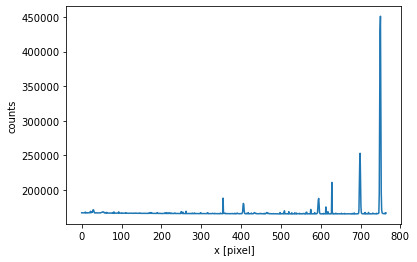

In [4]:
# plot spectrum

plt.plot(spec_1d)
plt.xlabel('x [pixel]')
plt.ylabel('counts')
#plt.legend(['mean flat-field counts','best-fit 2nd degree polynomial'])

In [5]:
# note: spec_1d is a one-dimensional array.  
# the x-coordinate (in pixels) is simply the array index.  
# let's explicitly build an array for them:
x=np.arange(ncols)

In [6]:
# make a 1d array from a function, same dimension as data array
func_1d = 200000 + 100*x

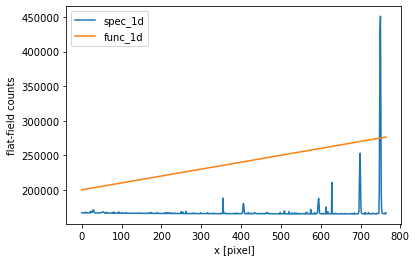

In [7]:
plt.plot(spec_1d)
plt.plot(func_1d)
plt.xlabel('x [pixel]')
plt.ylabel('flat-field counts')
plt.legend(['spec_1d','func_1d'])

In [8]:
# make 2d array of the same dimension as the data,
# where each row is funce_1d

func_2d = np.broadcast_to(func_1d,(nrows,ncols))

In [9]:
# write out the image
# add comment line to header
spec_head['HISTORY'] = 'normalized by best-fit 2nd degree polynomial'
fits.writeto('spec_out.fits',func_2d,spec_head,overwrite=True)